In [123]:
%matplotlib inline
# import os    
# os.environ["FFMPEG_BINARY"] = "/usr/local/bin/ffmpeg"
import mxnet as mx
from gluoncv import model_zoo, data, utils
from moviepy.editor import VideoFileClip, VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
net = model_zoo.get_model('mask_rcnn_resnet50_v1b_bdd', pretrained=False)
net.load_parameters('bddv3onehotmask_rcnn_resnet50_v1b_bdd_0004.params')

In [56]:
myclip = VideoFileClip('/Volumes/DATASET/file3763.mov')
iter_frame = myclip.iter_frames()

In [95]:
def plot_drivable_map(img, drivable_map, alpha=0.5):
    color = np.array([0,255,255])
    drivable_map[:,:,0]=0
    mask = drivable_map
    img = np.where(mask, img * (1 - alpha) + color * alpha, img)
    return img.astype('uint8')

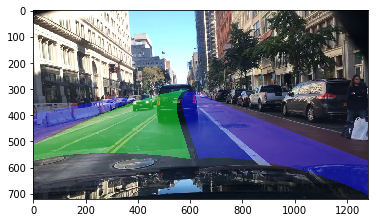

In [141]:
x = mx.image.imread('b1c81faa-c80764c5_drivable_id.png')
img = mx.image.imread('0a0eaeaf-9ad0c6dd.jpg')
# print(net(x))
import mxnet as mx
import numpy as np
# x.shape

a,b,c = mx.nd.split(x, axis=2, num_outputs=3)
a = a==0.
b = b==1.
c = c==2.
x = mx.nd.concat(a,b,c,dim=2).astype(np.float32)

# plt.imshow(x.asnumpy()*255)
# plt.show()
res = plot_drivable_map(img.asnumpy(), x.asnumpy(), alpha=0.5)
plt.imshow(res)
plt.show()

In [109]:
# re_size = mx.image.ForceResizeAug((640,360), interp=2)
# x.shape

(720, 1280, 3)

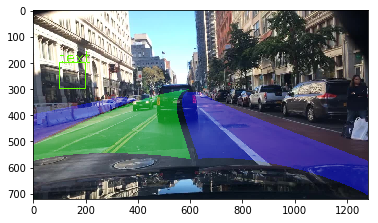

In [134]:
x = 100
y = 200
w = 100
h = 100
cv2.rectangle(res, (x,y), (x+w,y+h), (100,255,0), 2)
# cv2.putText()
font = cv2.FONT_HERSHEY_SIMPLEX
# 输入参数为图像、文本、位置、字体、大小、颜色数组、粗细
cv2.putText(res, 'text', (x,y), font, 2, (100,255,0), 2)
plt.imshow(res)
plt.show()

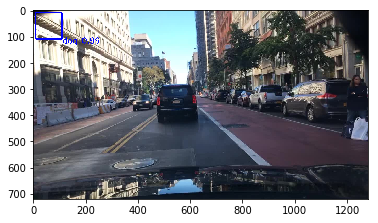

In [149]:
im = img.asnumpy()
font = cv2.FONT_HERSHEY_SIMPLEX  # 使用默认字体
cv2.rectangle(im, (10, 10), (110, 110), (0, 0, 255), thickness=3)
# cv2.floodFill()
# cv2.rectangle(img, (113), int(110)), (int(300), int(135),
#               (255, 0, 0), thickness=-1)
class_name = 'dog'
score = 0.99
cv2.putText(im, class_name + ' ' + str(score), (int(113), int(126)), font, 1, (0, 0, 255), 2)
plt.imshow(im)
plt.show()

 97%|█████████▋| 30/31 [00:05<00:00,  5.84it/s]


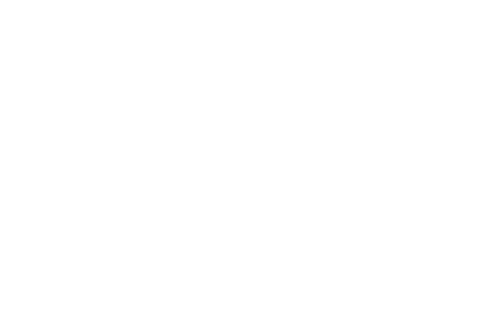

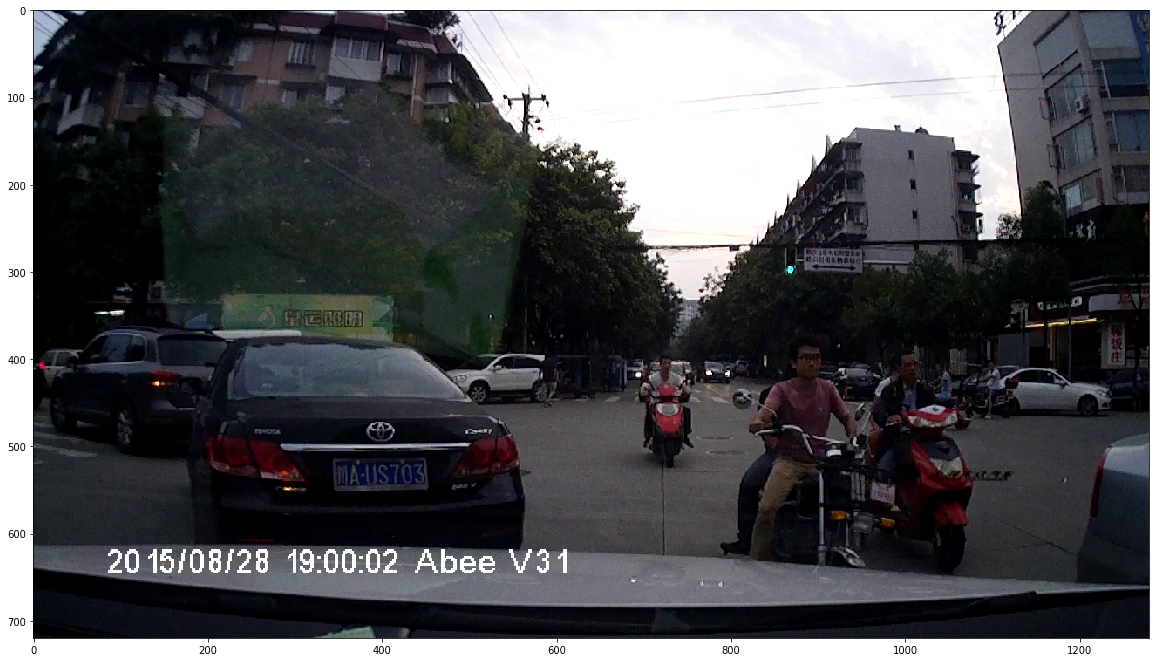

In [62]:
duration = 60*3

plt.axis('off')
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1)

re_size = mx.image.ForceResizeAug((1280,640), interp=2)
# fig, ax = plt.subplots()
def make_frame(t):
    orig_img = next(iter_frame)
    
    img = mx.nd.image.to_tensor(orig_img)
    img = mx.nd.image.normalize(img, mean=mean, std=std)
    input_tensor = img.expand_dims(0)
    
    ids, scores, bboxes, drivable_maps = net(x)
    
    ids, scores, bboxes = [xx[0].asnumpy() for xx in [ids, scores, bboxes]]
    
    mask = drivable_maps[0].transpose((1,2,0))
    mask = re_size(mask)
    orig_img = plot_drivable_map(frame, mask.asnumpy()) 
    CLASSES = ['traffic light', 'traffic sign', 'person', 'rider', 'bike', 'bus', 'car', 'motor', 'train', 'truck']
    ax.clear()
    ax = fig.add_subplot(1, 1, 1)
    ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids, class_names=CLASSES, ax=ax)
    
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
animation.write_videofile("my_animation.mp4", fps=30)
# animation.ipython_display(fps=30, loop=True, autoplay=True)


In [112]:
import cv2

In [113]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [120]:
def draw_test():
 
    #生成深蓝色绘图画布
    array = np.ndarray((480, 640, 3), np.uint8)
 
    array[:, :, 0] = 0
    array[:, :, 1] = 0
    array[:, :, 2] = 100
 
    image = Image.fromarray(array)
 
    #创建绘制对象
    draw = ImageDraw.Draw(image)
    
    #绘制直线
    draw.line((20, 20, 150, 150), 'cyan')
 
    #绘制矩形
    draw.rectangle((100, 200, 300, 400), 'black', 'red')
 
    #绘制弧
    draw.arc((100, 200, 300, 400), 0, 180, 'yellow')
    draw.arc((100, 200, 300, 400), -90, 0, 'green')
 
    #绘制弦
    draw.chord((350, 50, 500, 200), 0, 120, 'khaki', 'orange')
 
    #绘制圆饼图
    draw.pieslice((350, 50, 500, 200), -150, -30, 'pink', 'crimson')
    
    #绘制椭圆
    draw.ellipse((350, 300, 500, 400), 'yellowgreen', 'wheat')
    #外切矩形为正方形时椭圆即为圆
    draw.ellipse((550, 50, 600, 100), 'seagreen', 'skyblue') 
 
    #绘制多边形
    draw.polygon((150, 180, 200, 180, 250, 120, 230, 90, 130, 100), 'olive', 'hotpink')
 
    #绘制文本
#     font = ImageFont.truetype("consola.ttf", 40, encoding="unic")#设置字体
    draw.text((100, 50), u'Hello World')
 
 
    return image

In [121]:
image = draw_test()

In [122]:
image

AttributeError: 'Image' object has no attribute 'shape'